In [1193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Prepare Dataset(Titanic)

In [1194]:
# Titanic Dataset 불러오기
import seaborn as sns
df_og = sns.load_dataset('titanic')
df_og.head()

# 분석용 데이터셋 복사
df = df_og.copy()

In [1195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [1196]:
# 변수 'who'가 무엇인지 확인
display(df['who'])
display(df.loc[:,['sex','who']]) # 'sex'와 'who'는 사실상 동일한 정보를 나타내는 변수 -> 변수명이 비교적 명확하지 않은 'who' 제거
df.drop(columns = ['who'], inplace = True)

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: object

,sex,who
0,male,man
1,female,woman
2,female,woman
3,female,woman
4,male,man
...,...,...
886,male,man
887,female,woman
888,female,woman
889,male,man


In [1197]:
# 변수 embarked와 embark_town이 무엇인지 확인
display(df.loc[:,['embarked','embark_town']]) # 사실상 동일한 변수임 -> 한 변수는 제거
df.drop(columns = ['embarked'],inplace = True)

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


In [1198]:
# 변수 survived와 alive가 무엇인지 확인
display(df.loc[:,['survived','alive']]) # 사실상 두 변수는 동일한 정보를 나타냄 -> string 형태의 값을 가지는 alive 변수 제거
df.drop(columns = ['alive'], inplace = True)

,survived,alive
0,0,no
1,1,yes
2,1,yes
3,1,yes
4,0,no
...,...,...
886,0,no
887,1,yes
888,0,no
889,1,yes


In [1199]:
# 결측치 확인
display(df.isnull().sum()) # 전체 Instance 수가 891인데 'deck'에는 결측치가 688개 존재 -> deck 변수는 분석에서 제외
df.drop(columns = ['deck'], axis = 1, inplace = True)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [1200]:
# age 변수에 0.92와 같이 float 형태의 값이 있음
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [1201]:
# 'age' 변수에서 nan이 아니고 0.92와 같이 float인 instance 개수 확인
candidates = []
for i in list(df['age']):
    if not str(i).endswith('0') and not pd.isna(i):
        candidates.append(i)

len(candidates)

25

In [1202]:
# 'age' 변수 값 전처리 (반올림)
df['age'] = df['age'].apply(lambda x: np.round(x))

# 반올림이 제대로 적용되었는지 확인
candidates = []
for i in list(df['age']):
    if not str(i).endswith('0') and not pd.isna(i):
        candidates.append(i)

len(candidates)

0

In [1203]:
# age가 결측치인 row는 분석에서 제외
df = df.dropna(subset = ['age']).reset_index(drop = True)

In [1204]:
display(df.isnull().sum())# embark_town 변수에 Null값이 2개 존재

# 해당 Instance 제거
df = df.dropna(subset = ['embark_town'])

print('='*20, 'After Pre-Processing','='*20)
display(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
adult_male     0
embark_town    2
alone          0
dtype: int64

==================== After Pre-Processing ====================


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [1205]:
# 독립 변수, Target Attribute 분리
y = df.pop('survived')
X = df

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25)
print(len(train_X), len(test_X))

534 178


In [1206]:
# Categorical Feature -> LabelEncoder 이용 String을 Int Label로 매핑
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in ['sex','class','embark_town']:
    le = le.fit(X[feature])
    train_X[feature] = le.transform(train_X[feature])
    test_X[feature] = le.transform(test_X[feature])

# Index 초기화
train_X.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)

## Bootstrap Dataset 생성

In [1207]:
# Bootstrap Dataset 생성 함수 정의
def make_bs_data_list(train_X, train_y, bootstrap_num:int, verbose = 0) -> list:
    assert len(train_X) == len(train_y), "Your Train_X's length is not equal to Train_y's length"
    
    bootstrap_data_list = []
    
    total_index = set(range(len(train_X)))

    for i in range(bootstrap_num): # 데이터셋을 bootstrap_num만큼 반복 복원 추출 진행
        data_index = [data_index for data_index in range(train_X.shape[0])]
        random_data_index = np.random.choice(data_index, train_X.shape[0]) # 복원 추출
        
        valid_index = list(total_index.difference(set(random_data_index)))

        bs_train_X = train_X.iloc[random_data_index,]
        bs_train_y = train_y.iloc[random_data_index,]
        bs_valid_X = train_X.iloc[valid_index,]
        bs_valid_y = train_y.iloc[valid_index,]

        bootstrap_data_list.append([bs_train_X,bs_train_y, bs_valid_X, bs_valid_y])

        if (valid_index != 0) & (verbose == 1):
            print(f"{i+1}번째 Bootstrap을 생성할 때 한 번도 선택되지 않은 Instance가 존재하여 Validation Set을 생성했습니다.")
            print(f'Validation Set으로 사용된 Instance의 수: {len(valid_index)} ({np.round(len(valid_index)/len(total_index)*100,2)}%) \n')

    return bootstrap_data_list

In [1208]:
bs_data_list = make_bs_data_list(train_X, train_y, 9, verbose = 1) # bs_data_list = [[Bootstrap1's train_X, Bootstrap1's train_Y, Bootstrap1's valid_X, Bootstrap1's valid_Y], ...]

1번째 Bootstrap을 생성할 때 한 번도 선택되지 않은 Instance가 존재하여 Validation Set을 생성했습니다.
Validation Set으로 사용된 Instance의 수: 193 (36.14%) 

2번째 Bootstrap을 생성할 때 한 번도 선택되지 않은 Instance가 존재하여 Validation Set을 생성했습니다.
Validation Set으로 사용된 Instance의 수: 189 (35.39%) 

3번째 Bootstrap을 생성할 때 한 번도 선택되지 않은 Instance가 존재하여 Validation Set을 생성했습니다.
Validation Set으로 사용된 Instance의 수: 192 (35.96%) 

4번째 Bootstrap을 생성할 때 한 번도 선택되지 않은 Instance가 존재하여 Validation Set을 생성했습니다.
Validation Set으로 사용된 Instance의 수: 197 (36.89%) 

5번째 Bootstrap을 생성할 때 한 번도 선택되지 않은 Instance가 존재하여 Validation Set을 생성했습니다.
Validation Set으로 사용된 Instance의 수: 202 (37.83%) 

6번째 Bootstrap을 생성할 때 한 번도 선택되지 않은 Instance가 존재하여 Validation Set을 생성했습니다.
Validation Set으로 사용된 Instance의 수: 194 (36.33%) 

7번째 Bootstrap을 생성할 때 한 번도 선택되지 않은 Instance가 존재하여 Validation Set을 생성했습니다.
Validation Set으로 사용된 Instance의 수: 198 (37.08%) 

8번째 Bootstrap을 생성할 때 한 번도 선택되지 않은 Instance가 존재하여 Validation Set을 생성했습니다.
Validation Set으로 사용된 Instance의 수: 191 (35.77%) 

9번째 Bootstrap을 생성할 때 한 번

## Base Model 정의

### Decision Tree

In [1223]:
from sklearn.tree import DecisionTreeClassifier

In [1314]:
def make_classifier(bs_data_list:list, bootstrap_num:int ,dt_max_depth:int, max_leaf_nodes:int):
    '''
    input: bs_data_list, bootstrap_num, dt_max_depth
    output: decision_trees

    boostrap_num: Should be same number(int) that used ini "make_bs_data_list" function
    '''
    models_list = []

    for idx, xy in enumerate(range(bootstrap_num)):
        train_x, train_y = bs_data_list[xy][0], bs_data_list[xy][1]
        globals()['{}_th_dt'.format(idx)] = DecisionTreeClassifier(max_depth = dt_max_depth, max_leaf_nodes= max_leaf_nodes).fit(train_x,train_y)
        models_list.append(globals()['{}_th_dt'.format(idx)])
    
    return models_list

In [1315]:
# bm_groups = [max_depth = 1인 Base Model들로 구성된 첫번째 앙상블에 사용될 모델들, max_depth = 2인 Base Model들로 구성된 두번째 앙상블에 사용될 모델들, ... ]
bm_groups = []

for i in [2,4,8,16]:
    globals()['{}_dt_group'.format(i)] = make_classifier(bs_data_list, bootstrap_num = 9, dt_max_depth= i, max_leaf_nodes= 20)
    bm_groups.append(globals()['{}_dt_group'.format(i)])

### Logistic Regressor

In [1321]:
from sklearn.linear_model import LogisticRegression

def make_classifier(bs_data_list:list, bootstrap_num:int, C:float):
    models_list = []

    for idx, xy in enumerate(range(bootstrap_num)):
        train_x, train_y = bs_data_list[xy][0], bs_data_list[xy][1]
        globals()['{}_th_dt'.format(idx)] = LogisticRegression(C = C).fit(train_x,train_y)
        models_list.append(globals()['{}_th_dt'.format(idx)])
    
    return models_list

In [1328]:
# 로지스틱 회귀분석 하이퍼 파라미터 중 C 값 변화
bm_groups = []

for c in [0.00001, 0.001, 1, 100, 10000]:
    globals()['{}_dt_group'.format(i)] = make_classifier(bs_data_list, bootstrap_num= 9, C = c)
    bm_groups.append(globals()['{}_dt_group'.format(i)])


### SVC

In [1132]:
from sklearn.svm import SVC

def make_classifier(bs_data_list:list, bootstrap_num:int, kernel):

    models_list = []

    for idx, xy in enumerate(range(bootstrap_num)):
        train_x, train_y = bs_data_list[xy][0], bs_data_list[xy][1]
        globals()['{}_th_dt'.format(idx)] = SVC(kernel = kernel).fit(train_x,train_y)
        models_list.append(globals()['{}_th_dt'.format(idx)])
    
    return models_list

In [1133]:
# SVC Kernel 변화
bm_groups = []

for kernel in ['linear','poly','rbf','sigmoid']:
    globals()['{}_dt_group'.format(i)] = make_classifier(bs_data_list, bootstrap_num= 9, kernel = kernel)
    bm_groups.append(globals()['{}_dt_group'.format(i)])

## Majority Voting

In [1329]:
# 위 Base Model Group 별로 각 Base Model을 생성하는데 사용된 Bootstrap의 Validation Set에 대한 F1 Score 확인
def check_basemodel_avg_f1(bs_data_list: list, bm_group: list) -> float:
    f1s = []
    avg_f1 = []

    for i, bootstrap in enumerate(bs_data_list):
        _, _, valid_x, valid_y = bootstrap
        pred = bm_group[i].predict(valid_x)
        f1s.append(f1_score(valid_y, pred))
        avg_f1 = np.mean(f1s)
    
    return avg_f1

In [1330]:
# Base Model Group 별 평균 F1 Score 확인 
for bm_group in bm_groups:
    print(np.round(check_basemodel_avg_f1(bs_data_list, bm_group),2))

0.35
0.53
0.77
0.77
0.77


In [1331]:
# 각 BM Group내에 있는 Base Model들의 Test Set에 대한 F1 성능 반환 함수 정의
# :각 BM Group내에 있는 Base Model들의 Test Set에 대한 성능과 Base Model들의 결과를 Majority Voting해서 얻은 성능 차이 비교하기 위함
def pred_result_per_bm_group(bm_group, test_X, test_y):
    
    bm_f1_list = []

    for bm in bm_group:
        pred_result = bm.predict(test_X)
        f1 = np.round(f1_score(test_y, pred_result), 4)
        bm_f1_list.append(f1)

    return bm_f1_list

In [1332]:
def majority_voting(bm_group:list, test_X):
    preds_per_bm_group = [bm.predict(test_X) for bm in bm_group]
    mv_pred = pd.DataFrame(preds_per_bm_group).T.mode(axis = 1)

    return mv_pred

Base Model's F1 Scores: [0.382, 0.2308, 0.3778, 0.2308, 0.382, 0.3448, 0.4, 0.3636, 0.382], Ensemble Model's F1 Score: 0.382


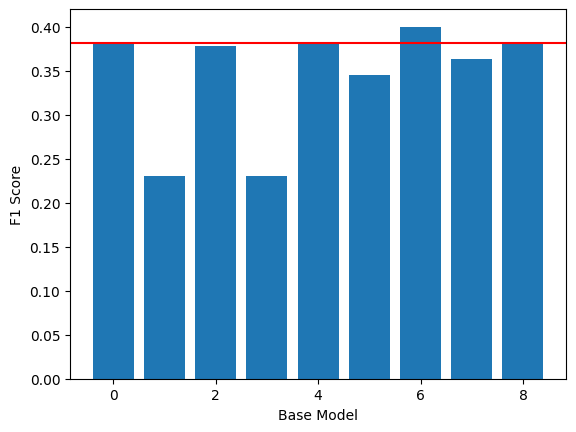

Base Model's F1 Scores: [0.4528, 0.382, 0.4364, 0.4356, 0.434, 0.4381, 0.4324, 0.4314, 0.4381], Ensemble Model's F1 Score: 0.4231


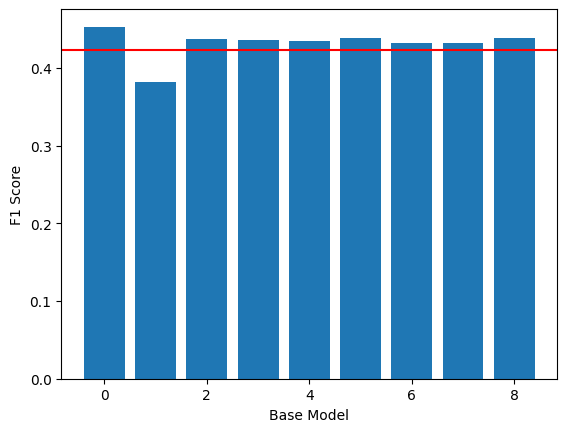

Base Model's F1 Scores: [0.7559, 0.768, 0.7656, 0.7538, 0.7559, 0.7559, 0.75, 0.7559, 0.7805], Ensemble Model's F1 Score: 0.7559


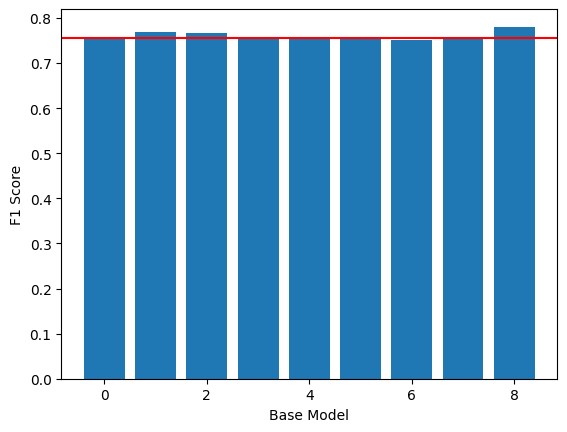

Base Model's F1 Scores: [0.7619, 0.7559, 0.7559, 0.7538, 0.75, 0.7402, 0.7442, 0.7559, 0.7667], Ensemble Model's F1 Score: 0.75


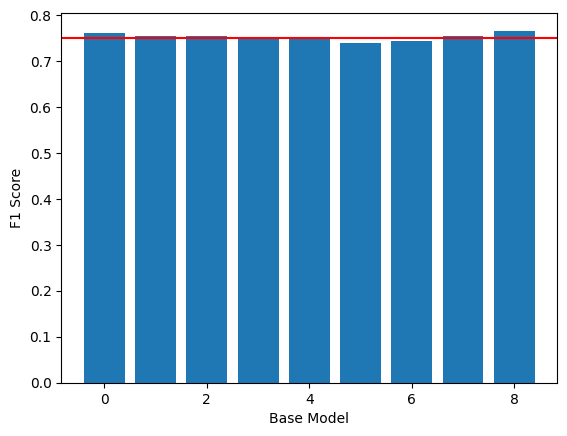

Base Model's F1 Scores: [0.7619, 0.7619, 0.7656, 0.7538, 0.75, 0.7402, 0.7442, 0.7559, 0.7769], Ensemble Model's F1 Score: 0.75


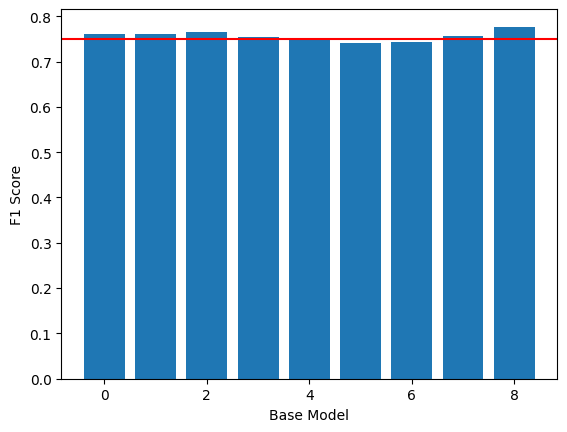

In [1333]:
import matplotlib.pyplot as plt

for bm_group in bm_groups:
    bm_f1_list = pred_result_per_bm_group(bm_group, test_X, test_y) # bm_f1_list example: [0.3429, 0.3967, 0.5103, 0.493, 0.4298, 0.5139, 0.3704, 0.493, 0.4386]
    mv_pred = majority_voting(bm_group, test_X)
    ensemble_f1 = np.round(f1_score(test_y, mv_pred),4)
    
    print(f"Base Model's F1 Scores: {bm_f1_list}, Ensemble Model's F1 Score: {ensemble_f1}")

    plt.xlabel('Base Model')
    plt.ylabel('F1 Score')
    plt.bar(range(len(bm_f1_list)), bm_f1_list)
    plt.gca().axhline(ensemble_f1,0,1, color = 'red') # Ensemble 결과 F1 Score는 Red Line으로 표시

    plt.show()